In [1]:
import numpy as np
from model import LotkaVolterraModel
from summstats import LotkaVolterraStats

import matplotlib.pyplot as plt

import delfi.distribution as dd
import delfi.generator as dg
import delfi.inference as infer
from delfi.utils.viz import plot_pdf

from parameters import ParameterSet

%matplotlib notebook

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [8]:
params = ParameterSet({})

params.seed = 42

params.model = ParameterSet({})
params.model.dt = 0.2
params.model.T = 30

params.logparam_limits = (-5,2)

params.true_params = np.log([0.01, 0.5, 1, 0.01])

params.res = ParameterSet({})
params.res.n_hiddens = [20,20]
params.res.convert_to_T = 3
params.res.pilot_samples = 1000
params.res.svi = False

params.train = ParameterSet({})
params.train.n_train = 10000
params.train.n_rounds = 1

In [9]:
m = LotkaVolterraModel(dt=params.model.dt, T=params.model.T, seed=params.seed)
param_limits = np.reshape(params.logparam_limits, (2,1)) * np.ones((1,len(params.true_params)))

p = dd.Uniform(*param_limits)
s = LotkaVolterraStats()

sample = m.gen_single(params.true_params)
params.obs_stats = s.calc([sample])[0]

In [10]:
def plot_sample(m, theta, s=None):
    fig = plt.figure()
    
    xlist = np.arange(0, m.T + m.dt, m.dt)
    
    sample = m.gen_single(theta)
    states = sample['data']
    
    for var in states:
        plt.plot(xlist, var)
        
    plt.show()
    
    if s is not None:
        print(s.calc([sample])[0])
    

<IPython.core.display.Javascript object>


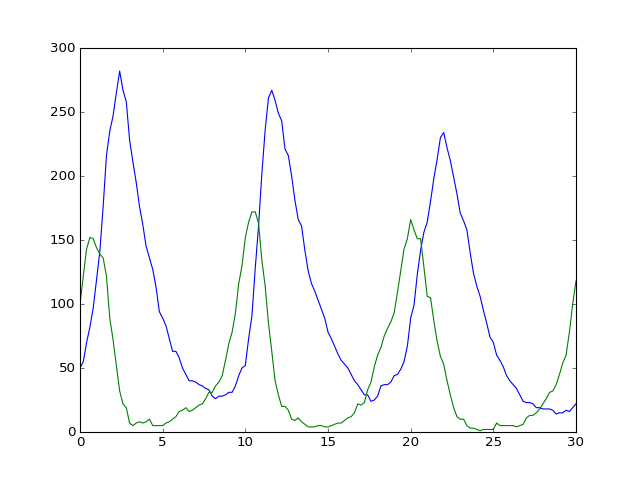

[   100.43708609     48.13245033   5885.94101545   2642.98233996
  15843.54966887  15614.33112583   4813.24503311   4606.68211921
   5000.06622517]


In [11]:
plot_sample(m, params.true_params, s)

In [6]:
for i in range(0):
    sample = p.gen(n_samples=1)
    plot_sample(m, sample, s)

In [12]:
g = dg.Default(model=m, prior=p, summary=s)

In [13]:
res = infer.SNPE(generator=g, 
                 obs=[params.obs_stats],
                 seed=params.seed, 
                 **params.res)

ret = res.run(**params.run)

posteriors = ret[2]

HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

KeyboardInterrupt: 

<IPython.core.display.Javascript object>


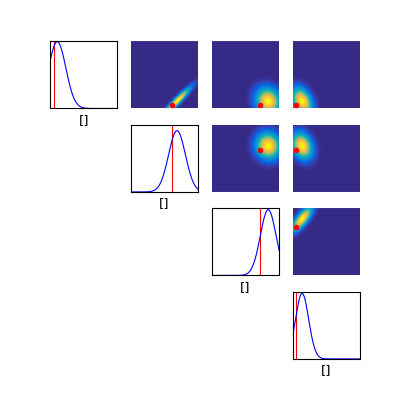

In [9]:
for posterior in posteriors[-1:]:
    plot_pdf(posterior, lims=params.logparam_limits, gt=params.true_params)

In [14]:
params.save(url='setup.prm')